In [1]:
import xarray as xr
import numpy as np

In [145]:
def find_legs(ds, elevation, tol=10):
    if ds.attrs['aircraft'] == 'Learjet':
        ds = ds.assign(altitude=lambda x: x['Palt'] * 0.3046)
    else:
        ds = ds.rename({" GPS_Altitude_YANG_MetNav": "altitude"})

    times = ds.time.where((ds['altitude'] >= elevation - tol) & (ds['altitude'] < elevation + tol), drop=True)
    difference = times.time.diff('time').dt.seconds
    idx_diff = np.argwhere(difference.values == 1).squeeze()
    stepsize = 1
    idx = np.split(idx_diff, np.where(np.diff(idx_diff) != stepsize)[0]+1)   
    idx_filt = [i for i in idx if len(i) >= 180]
    start_end = []
    for dates in idx_filt:
        start_end.append([times.time.isel(time=dates).values.min(), times.time.isel(time=dates).values.max()])
    return start_end

In [146]:
path = "/data/keeling/a/alfonso8/gpm/camp2ex/cloud_probes/zarr"

In [147]:
ds_lear = xr.open_zarr(f'{path}/Page0_Learjet.zarr')
ds_p3b = xr.open_zarr(f'{path}/p3b_merge.zarr')

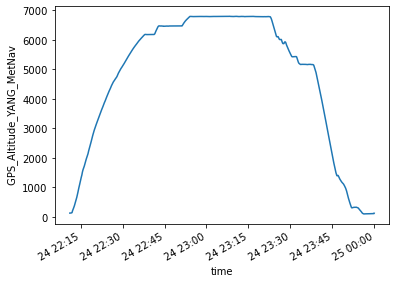

In [148]:
ds_p3b[" GPS_Altitude_YANG_MetNav"].sel(time="2019-08-24").plot()

In [149]:
## for p3
fl_p3 = find_legs(ds_p3b.sel(time=slice("2019-08-24 22:00", "2019-08-24 23:45")), elevation=6800, tol=50)
fl_p3

[[numpy.datetime64('2019-08-24T22:53:37.000000000'),
  numpy.datetime64('2019-08-24T23:22:59.000000000')]]

In [150]:
ds_lear = ds_lear.assign(altitude=lambda x: x['Palt'] * 0.3046)

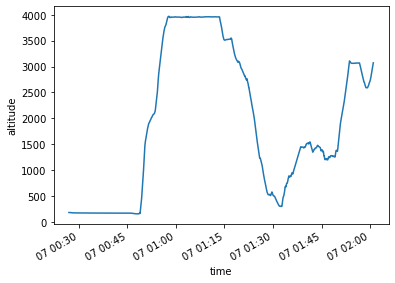

In [151]:
ds_lear.altitude.sel(time=slice("2019-09-07 00:00", "2019-09-07 02:00")).plot()

In [156]:
## for lear
fl_lear = find_legs(ds_lear.sel(time=slice("2019-09-07 00:00", "2019-09-07 02:00")), elevation=4000, tol=50)
fl_lear

[[numpy.datetime64('2019-09-07T00:58:26.000000000'),
  numpy.datetime64('2019-09-07T01:01:39.000000000')],
 [numpy.datetime64('2019-09-07T01:04:21.000000000'),
  numpy.datetime64('2019-09-07T01:13:27.000000000')]]

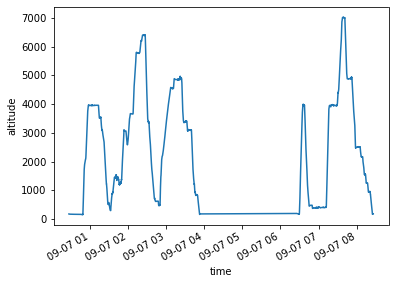

In [158]:
ds_lear.altitude.sel(time="2019-09-07").plot()